In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df=pd.read_csv('/content/drive/MyDrive/assignments-BE/ANN/diabetes.csv.xls')
df.head()# all are numerical columns
# DiabetesPedigreefunction gives the likelihood of being diabetic due to heredity
df.isnull().sum().any()# no null values
df.duplicated().sum()# no duplicate values


np.int64(0)

In [9]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df['Outcome'].value_counts()# imbalanced data

,count
Outcome,
0,500
1,268


In [3]:
# EDA
#Separating input and output
X=df.drop('Outcome',axis=1)
y=df['Outcome']
# Scaling the input
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=df.drop('Outcome',axis=1).columns)
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


<Axes: >

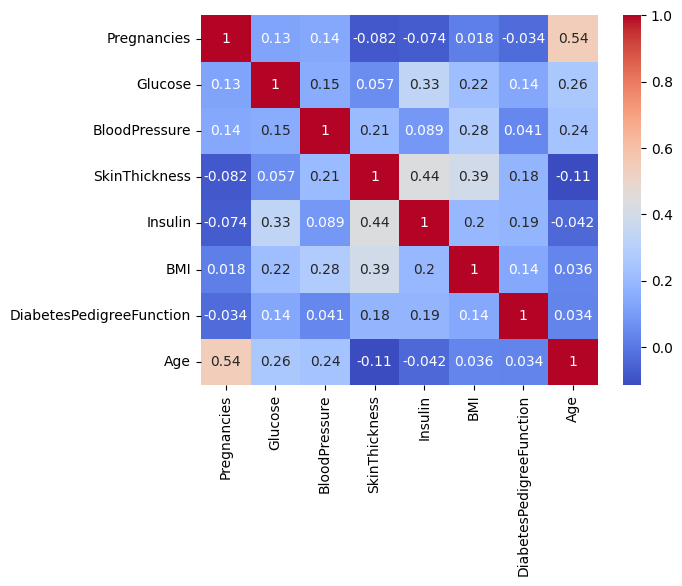

In [4]:
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')

In [ ]:
# from the heatmap we can say that all are important features


In [6]:
# Traintest split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)


In [13]:
# model building
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
# Training the model
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9865 - loss: 0.0637 - val_accuracy: 0.7727 - val_loss: 0.9373
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9735 - loss: 0.0869 - val_accuracy: 0.7662 - val_loss: 0.9624
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9843 - loss: 0.0696 - val_accuracy: 0.7727 - val_loss: 0.9801
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9711 - loss: 0.0832 - val_accuracy: 0.7662 - val_loss: 0.9738
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9829 - loss: 0.0625 - val_accuracy: 0.7857 - val_loss: 0.9748
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9905 - loss: 0.0577 - val_accuracy: 0.7662 - val_loss: 0.9951
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9891 - loss: 0.0653 - val_accuracy: 0.7857 - val_loss: 0.9984
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9877 - loss: 0.0663 - val_accuracy: 0.7792 - val_loss

In [ ]:
# As the difference in training accuracy and val_accuracy is more than 5%,it is overfitted model

In [18]:
# Testing the model
loss,accuracy=model.evaluate(X_test,y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7866 - loss: 1.3674 
Test Loss: 1.3535
Test Accuracy: 77.92%


In [ ]:
# highly overfitting model

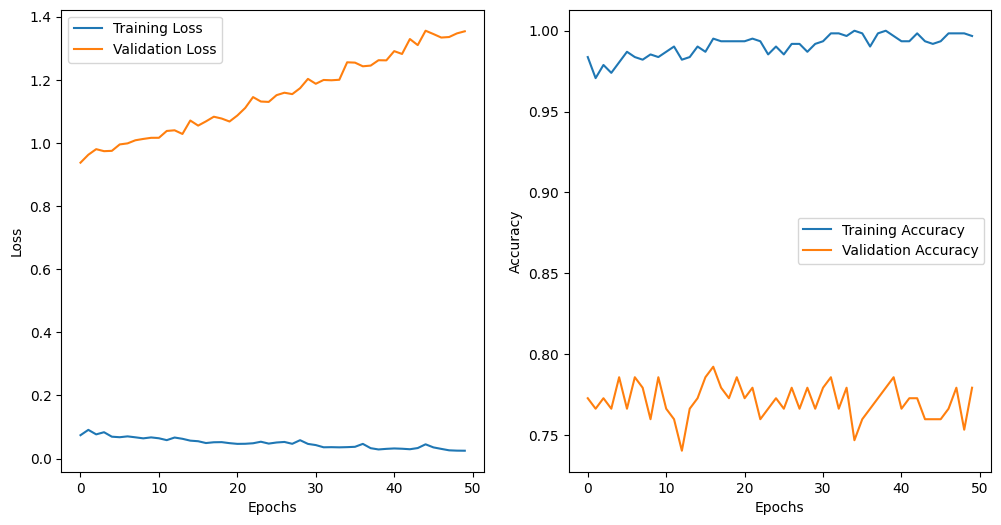

In [22]:
# plots
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# from the graphs we can clearly observe that val_accuracy is always below 80% irrespective of no.of epochs.,so we need to stop around 5 to 10 epochs to sustain the validation loss.